## POS (Part of Speech)

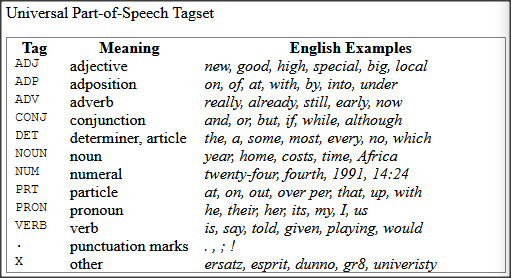
[NLTK](https://www.nltk.org/book/ch05.html)

Legende zu den Tags: https://www.guru99.com/pos-tagging-chunking-nltk.html

In [1]:
# Step One: Import nltk and download necessary packages

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davebrunner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/davebrunner/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/davebrunner/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/davebrunner/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
# Step Two: Load Data
 
sentence = """WASHINGTON -- In the wake of a string of abuses by New York police officers in the 1990s, Loretta E. Lynch, 
the top federal prosecutor in Brooklyn, spoke forcefully about the pain of a broken trust that African-Americans felt and 
said the responsibility for repairing generations of miscommunication and mistrust fell to law enforcement."""

In [3]:
from nltk import pos_tag
from nltk import RegexpParser
#text ="learn php from guru99 and make study easy".split()
text=sentence.split()
print("After Split:",text)
tokens_tag = pos_tag(text)
print("After Token:",tokens_tag)
patterns= """mychunk:{<NN.?>*<VBD.?>*<JJ.?>*<CC>?}"""
chunker = RegexpParser(patterns)
#d searching for patterns witch match a certain regex (siehe patterns=....)
print("After Regex:",chunker)
output = chunker.parse(tokens_tag)
print("After Chunking",output)

After Split: ['WASHINGTON', '--', 'In', 'the', 'wake', 'of', 'a', 'string', 'of', 'abuses', 'by', 'New', 'York', 'police', 'officers', 'in', 'the', '1990s,', 'Loretta', 'E.', 'Lynch,', 'the', 'top', 'federal', 'prosecutor', 'in', 'Brooklyn,', 'spoke', 'forcefully', 'about', 'the', 'pain', 'of', 'a', 'broken', 'trust', 'that', 'African-Americans', 'felt', 'and', 'said', 'the', 'responsibility', 'for', 'repairing', 'generations', 'of', 'miscommunication', 'and', 'mistrust', 'fell', 'to', 'law', 'enforcement.']
After Token: [('WASHINGTON', 'NNP'), ('--', ':'), ('In', 'IN'), ('the', 'DT'), ('wake', 'NN'), ('of', 'IN'), ('a', 'DT'), ('string', 'NN'), ('of', 'IN'), ('abuses', 'NNS'), ('by', 'IN'), ('New', 'NNP'), ('York', 'NNP'), ('police', 'NN'), ('officers', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('1990s,', 'CD'), ('Loretta', 'NNP'), ('E.', 'NNP'), ('Lynch,', 'NNP'), ('the', 'DT'), ('top', 'JJ'), ('federal', 'JJ'), ('prosecutor', 'NN'), ('in', 'IN'), ('Brooklyn,', 'NNP'), ('spoke', 'VBD'), (

In [4]:
small_text="The boy went to school in Zurich, but was born in a small city called Gorgonzola, in Italy"
tokens = nltk.word_tokenize(small_text)
print(tokens)
tag = nltk.pos_tag(tokens)
print(tag)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)
result.draw()    # It will draw the pattern graphically which can be seen in Noun Phrase chunking 

['The', 'boy', 'went', 'to', 'school', 'in', 'Zurich', ',', 'but', 'was', 'born', 'in', 'a', 'small', 'city', 'called', 'Gorgonzola', ',', 'in', 'Italy']
[('The', 'DT'), ('boy', 'NN'), ('went', 'VBD'), ('to', 'TO'), ('school', 'NN'), ('in', 'IN'), ('Zurich', 'NNP'), (',', ','), ('but', 'CC'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('a', 'DT'), ('small', 'JJ'), ('city', 'NN'), ('called', 'VBN'), ('Gorgonzola', 'NNP'), (',', ','), ('in', 'IN'), ('Italy', 'NNP')]
(S
  (NP The/DT boy/NN)
  went/VBD
  to/TO
  (NP school/NN)
  in/IN
  Zurich/NNP
  ,/,
  but/CC
  was/VBD
  born/VBN
  in/IN
  (NP a/DT small/JJ city/NN)
  called/VBN
  Gorgonzola/NNP
  ,/,
  in/IN
  Italy/NNP)


In [5]:
parse_tree = nltk.ne_chunk(nltk.tag.pos_tag(sentence.split()), binary=True)  # POS tagging before chunking!
named_entities = []
        
for chunk in parse_tree.subtrees():
    #print(t)
    #if t.label() in ('NE','DT'):
    if hasattr(chunk, 'label'):    
        #named_entities.append(t)
        #print("{} {}".format(list(c for c in chunk), chunk.label()))
        named_entities.append(list(chunk))  # if you want to save a list of tagged words instead of a tree
    #else:
        #print(chunk)

print(named_entities)
parse_tree.draw();

[[Tree('NE', [('WASHINGTON', 'NNP')]), ('--', ':'), ('In', 'IN'), ('the', 'DT'), ('wake', 'NN'), ('of', 'IN'), ('a', 'DT'), ('string', 'NN'), ('of', 'IN'), ('abuses', 'NNS'), ('by', 'IN'), Tree('NE', [('New', 'NNP'), ('York', 'NNP')]), ('police', 'NN'), ('officers', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('1990s,', 'CD'), ('Loretta', 'NNP'), ('E.', 'NNP'), ('Lynch,', 'NNP'), ('the', 'DT'), ('top', 'JJ'), ('federal', 'JJ'), ('prosecutor', 'NN'), ('in', 'IN'), ('Brooklyn,', 'NNP'), ('spoke', 'VBD'), ('forcefully', 'RB'), ('about', 'IN'), ('the', 'DT'), ('pain', 'NN'), ('of', 'IN'), ('a', 'DT'), ('broken', 'JJ'), ('trust', 'NN'), ('that', 'IN'), ('African-Americans', 'NNP'), ('felt', 'VBD'), ('and', 'CC'), ('said', 'VBD'), ('the', 'DT'), ('responsibility', 'NN'), ('for', 'IN'), ('repairing', 'VBG'), ('generations', 'NNS'), ('of', 'IN'), ('miscommunication', 'NN'), ('and', 'CC'), ('mistrust', 'NN'), ('fell', 'VBD'), ('to', 'TO'), ('law', 'NN'), ('enforcement.', 'NN')], [('WASHINGTON', 'NNP')

In [6]:
# Step Three: Tokenise, find parts of speech and chunk words 

for sent in nltk.sent_tokenize(sentence):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        #print(chunk)
        if hasattr(chunk, 'label'):
            #print(list(c for c in chunk))
            print("{} : {}".format(chunk,chunk.label()))
        #else:
        #    src = list(c for c in chunk)
        #    print(src[0][1])
        #    if (src[0][1] in ('NNP','NN','NNS','CD')):
        #        print("{} {}".format(src[0],src[1]))

(GPE WASHINGTON/NNP) : GPE
(GPE New/NNP York/NNP) : GPE
(PERSON Loretta/NNP E./NNP Lynch/NNP) : PERSON
(GPE Brooklyn/NNP) : GPE


In [12]:
sentence = """My father Tim used to travel to Rome for business, 
but a friend named Thimoty was asking him to not travel there but to Milan, 
closed to his hometown in St. Gallen."""

for sent in nltk.sent_tokenize(sentence):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        #print(chunk)
        if hasattr(chunk, 'label'):
            #print(list(c for c in chunk))
            print("{} : {}".format(chunk,chunk.label()))
        #else:
        #    src = list(c for c in chunk)
        #    print(src[0][1])
        #    if (src[0][1] in ('NNP','NN','NNS','CD')):
        #        print("{} {}".format(src[0],src[1]))

(PERSON Tim/NNP) : PERSON
(GPE Rome/NNP) : GPE
(PERSON Thimoty/NNP) : PERSON
(PERSON Milan/NNP) : PERSON
(GPE St./NNP Gallen/NNP) : GPE


In [8]:
test="Italian people, while protesting on the streets of Rome, were arrested due to martial law application."
tokens = nltk.word_tokenize(test)
print(tokens)
tag = nltk.pos_tag(tokens)
print(tag)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)
result.draw() 

['Italian', 'people', ',', 'while', 'protesting', 'on', 'the', 'streets', 'of', 'Rome', ',', 'were', 'arrested', 'due', 'to', 'martial', 'law', 'application', '.']
[('Italian', 'JJ'), ('people', 'NNS'), (',', ','), ('while', 'IN'), ('protesting', 'VBG'), ('on', 'IN'), ('the', 'DT'), ('streets', 'NNS'), ('of', 'IN'), ('Rome', 'NNP'), (',', ','), ('were', 'VBD'), ('arrested', 'VBN'), ('due', 'JJ'), ('to', 'TO'), ('martial', 'JJ'), ('law', 'NN'), ('application', 'NN'), ('.', '.')]
(S
  Italian/JJ
  people/NNS
  ,/,
  while/IN
  protesting/VBG
  on/IN
  the/DT
  streets/NNS
  of/IN
  Rome/NNP
  ,/,
  were/VBD
  arrested/VBN
  due/JJ
  to/TO
  (NP martial/JJ law/NN)
  (NP application/NN)
  ./.)


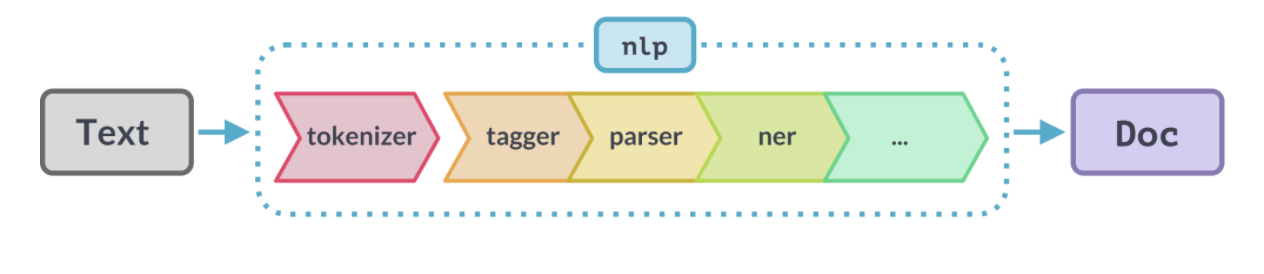
taken from official [spaCy 101 website](https://spacy.io/usage/spacy-101)

In [1]:
# import spacy
import spacy

In [ ]:
# !python3 -m spacy download en_core_web_sm

In [2]:
# load spacy model (small model)
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
test="Italian people, while protesting on the streets of Rome, were arrested due to martial law application."
spacy.displacy.render(nlp(test), style="ent",jupyter=True)

In [ ]:
# load data
sentence = "Apple is looking at buying U.K. startup for $1 billion"
doc = nlp(sentence)
 
# print entities
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [ ]:
spacy.displacy.render(doc, style="ent",jupyter=True)

In [ ]:
# load data
sentence = "the Kennedys, for all intents and purposes, have always been defined as the only 'royal house' in the United States."
doc = nlp(sentence)
 
# print entities
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Kennedys 4 12 PERSON
the United States 98 115 GPE


In [ ]:
spacy.displacy.render(doc, style="ent",jupyter=True)

In [ ]:
spacy.explain(u"NORP")

'Nationalities or religious or political groups'

In [ ]:
spacy.explain(u"GPE")

'Countries, cities, states'

In [15]:
spacy.displacy.render(nlp(small_text), style="ent",jupyter=True)

NameError: name 'spacy' is not defined

Spacy web based model present also a "medium" and a "large" model (named 'en_core_web_md' and 'en_core_web_lg' respectively)

They can be used specifying them as the parameters of a spacy.load() call

In [ ]:
from spacy import displacy

def analyze_POS(sentence, model, vis=False):
    nlp = spacy.load(model)
    doc = nlp(sentence)
    # print entities
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    displacy.render(doc, style="ent", jupyter=True)
    if vis: 
        displacy.render(doc, style='dep', jupyter=True)

In [ ]:
# !python3 -m spacy download en_core_web_md
# !python3 -m spacy download en_core_web_lg

In [ ]:
s1 = "The professor Mazzola said on Monday he would give us an example exam." #ambigous
s1b = "The professor Mazzola said, on Monday he would give us an example exam." # not ambiguos
# s1c: can you write the other 

#s1c = "The professor Mazzola said on Monday that he would give us an example exam."
#s1d = "The professor Mazzola said that he would give us an example exam on Monday."
s2 = "The chicken is ready to eat."
s2b = "The chicken is ready-to-eat."
s2c = "The chicken is ready to eat, but it does not have food avaiable."
s2d = "The chicken is ready to be fed."
s3 = "The guest threatened the student with the knife."
#s3a policemen instead of guest
#s3b burglar instad of guest
#"Natural" interpetation?

s4 = "Visiting relatives can be boring."
s4a = "My visiting relatives can be boring."
# Can be boring to visit relatives
# Relatives that come to visit can be boring

m = "en_core_web_lg"

In [ ]:
analyze_POS(s1, m, True)

Mazzola 14 21 PERSON
Monday 30 36 DATE


In [ ]:
analyze_POS(s1b, m, True)

Mazzola 14 21 PERSON
Monday 31 37 DATE


In [ ]:
analyze_POS(s2, m, True)

/usr/local/lib/python3.9/dist-packages/spacy/displacy/__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
analyze_POS(s2b, m, True)

In [ ]:
analyze_POS(s2c, m, True)

In [ ]:
analyze_POS(s2d, m, True)

In [ ]:
analyze_POS(s3, m, True)

In [ ]:
analyze_POS(s4, m, True)

In [ ]:
analyze_POS(s4a, m, True)

In [ ]:
analyze_POS("Relatives that visit can be boring", m, True)

In [ ]:
analyze_POS("Visiting relatives, can be boring", m, True)

### A longer example

In [ ]:
sentence = """
The yellow pond turtle (Mauremys mutica), is a medium-sized (to 19.5 cm), semi-aquatic turtle in the family Geoemydidae. 
This species has a characteristic broad yellow stripe extending behind the eye and down the neck; 
the carapace ranges in color from grayish brown to brown and the plastron is yellow or orange with black blotches along 
the outer edges.[3] It is found in East Asia, ranging from central Vietnam and Laos, north through the coastal provinces 
of south and central China. Additional insular populations are found in Taiwan, Hainan and the Ryukyu Islands.[1] 
The Japanese populations are believed to have been introduced as a result of imports from Taiwan.[4]
This species inhabits ponds, creeks, swamps, marshes and other bodies of shallow, slow-moving water. It is omnivorous, 
feeding on insects, fish, tadpoles, and vegetable matter such as leaves and seeds. The yellow pond turtle generally 
remains in or close to water during the day but may become more active at night and during rainy weather, 
when it sometimes ventures onto land.[4]
One subspecies, Mauremys mutica kami, is currently recognized in the Ryukyu Islands.[4] 
Research has shown unexpected genetic diversity in M. mutica, raising the possibility that additional subspecies might exist. 
Evidence of widespread hybridization further complicates efforts to understand the genetics of this and related species.[5] 
Several hybrid Asian pond turtles that were described as new species have been found to be hybrids. 
Fujian pond turtles (Mauremys iversoni) are hybrid specimens mainly produced in Chinese turtle farms, 
usually from matings between female yellow pond turtles and golden coin turtles (Cuora trifasciata) males. 
The supposed Mauremys pritchardi turtles are wild and captive-bred hybrids between the present species 
and the Chinese pond turtle (Chinemys reevesi).[6][7]
"Clemmys guangxiensis" is a composite taxon described from specimens of Mauremys mutica and 
the natural hybrid "Mauremys" × iversoni.[7]
The yellow pond turtle is threatened with extinction. 
China is the largest consumer of turtles in the world and this trade has been cited 
as the greatest threat to Asian turtles including M. mutica. Most of the turtle trade 
is destined for human consumption but traditional medicine[8] and the pet trade are also driving 
demand for turtles.[9][10][11] Habitat loss and water pollution are additional impacts. 
The IUCN considers M. mutica a critically endangered species and it is listed in CITES Appendix II.[1]
"""
## text taken from: https://en.wikipedia.org/wiki/Yellow_pond_turtle

In [ ]:
# load spacy model (small model)
nlp = spacy.load('en_core_web_sm')
doc = nlp(sentence)
spacy.displacy.render(doc, style="ent",jupyter=True)

## EXERCISE 1:

Using the previous text in the "sentence" variable: 
* consider the already run small model, 
* run the medium, and 
* run the large model

Compare and contrast the results, in term of 
* number of entities identified and 
* class assigned to each of the identified element

What can you observe?

#### BONUS - [flairNLP](https://github.com/flairNLP/flair) 

In [ ]:
!pip3 install flair

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 322 kB 4.5 MB/s            
     |████████████████████████████████| 59 kB 73.8 MB/s            
     |████████████████████████████████| 981 kB 18.8 MB/s            
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 881.9 MB 52.8 MB/s            
     |████████████████████████████████| 788 kB 29.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 11.2 MB 23.2 MB/s            
     |████████████████████████████████| 19.7 MB 31.8 MB/s            
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 64 kB 38.2 MB/s            
  Preparing metadata (setup.py) ... done
     |███████████████████████

  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116678 sha256=016386c81a24ea146d938745f60a872468d34df7d9586f5abd9f2035842b9adb
  Stored in directory: /tmp/pip-ephem-wheel-cache-bm8ttejb/wheels/a6/f4/e6/e40ff9021f6b3854af70fa8ea004f5ab95672817462df08fed
  Created wheel for segtok: filename=segtok-1.5.10-py3-none-any.whl size=25019 sha256=1741ada4dccfd487c73f2244783c38e14a69aa1761e3a57d037d9bad226e7440
  Stored in directory: /tmp/pip-ephem-wheel-cache-bm8ttejb/wheels/e2/18/5e/97893138f61cd5cdb9d1e8e3d10f138910b0ecd3a2370ba0da
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-py3-none-any.whl size=14375 sha256=a052f43cc74e4d8b846caadaf7455334a90e988c57a6eb83e5880ecdeae210c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-bm8ttejb/wheels/ce/4d/44/3ab767a772715f6201d85f49d454db3e08f283cece4c2e356c
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41913 sha256=8a4c298991ea667789eae233abfae9feb411c23f55bd2eedbc94f0c1defc6329
  Stored in director

In [ ]:
from flair.data import Sentence
from flair.models import SequenceTagger

ModuleNotFoundError: No module named 'flair'

In [ ]:
# make a sentence
sentence = Sentence(small_text)

# load the NER tagger
tagger = SequenceTagger.load('ner')

# run NER over sentence
tagger.predict(sentence)

In [ ]:
print(sentence)
print('The following NER tags are found:')

# iterate over entities and print
for entity in sentence.get_spans('ner'):
    print(entity)